In [1]:
import sys
sys.path.append('../')
from config import configuration
config = configuration()
config.request_password()

 ·············


In [2]:
import sqlutilpy
data = pd.DataFrame(
         sqlutilpy.get('''
         select * from jason_sanders.virac2_variables where prob>0.9 and class='RRab' ''',
                    **config.wsdb_kwargs)
       )
dataRRcd = pd.DataFrame(
         sqlutilpy.get('''
         select * from jason_sanders.virac2_variables where prob>0.9 and class='RRcd' ''',
                    **config.wsdb_kwargs)
       )
import sys
sys.path.append('../../../../')
from pm_transform import ml_mb
data = ml_mb(data)
dataRRcd = ml_mb(dataRRcd)

In [ ]:
# Mode Band a σa b σb c σc rms Nstar

# FU Ks0 17.360 0.005 −2.84 0.02 0.14 16897
# FO Ks0 16.860 0.023 −2.98 0.05 0.17 5236

# FU J0 17.699 0.005 −2.50 0.02 0.15 16868
# FO J0 17.241 0.022 −2.53 0.04 0.17 5225

# FU Ks0 17.547 0.008 −2.80 0.02 0.114 0.004 0.13 13081
# FO Ks0 16.850 0.026 −2.99 0.05 0.011 0.012 0.17 5132

# FU J0 17.888 0.008 −2.45 0.02 0.121 0.004 0.14 13081
# FO J0 17.225 0.030 −2.53 0.05 -0.010 0.012 0.17 4946

38.974989207883276 2.9327587675985507 8.260449590264278
43.164350692503426 2.2405144528257237 8.30501843659596


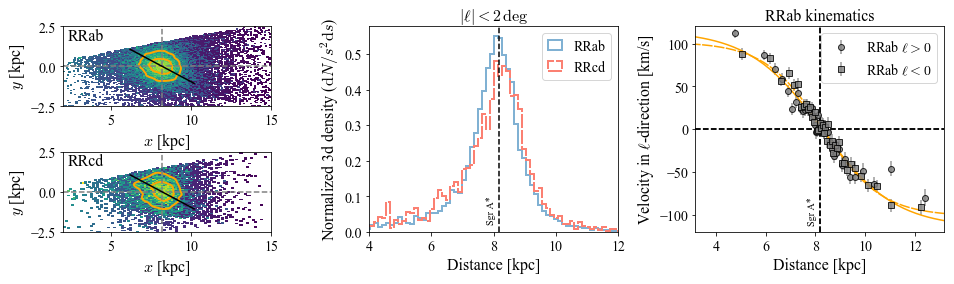

In [7]:
fig3 = plt.figure(figsize=[13.5,4.])
gs = fig3.add_gridspec(2,3)
f3_ax1 = fig3.add_subplot(gs[0, 0])
from scipy.ndimage import gaussian_filter

coeff=0.428
corr=0.
dist_rrab = np.power(10.,0.2*(
    data['ks_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag'])
    +(2.84-coeff*(2.5-2.84))*np.log10(data['period'])
    +18.477-(17.36-coeff*(17.699-17.36))+corr)-2)

dist_rrcd = np.power(10.,0.2*(
    dataRRcd['ks_ivw_mean_mag']-coeff*(dataRRcd['j_ivw_mean_mag']- dataRRcd['ks_ivw_mean_mag'])
    +(2.98-coeff*(2.53-2.98))*np.log10(dataRRcd['period'])
    +18.477-(16.86-coeff*(17.241-16.86)))-2)

peak_metal = -0.942

dist_rrab = np.power(10.,0.2*(
    data['ks_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag'])
    +(2.80-coeff*(2.45-2.80))*np.log10(data['period'])
    -(0.114-coeff*(0.121-0.114))*(peak_metal)
    +18.477-(17.547-coeff*(17.888-17.547))+corr)-2)

dist_rrcd = np.power(10.,0.2*(
    dataRRcd['ks_ivw_mean_mag']-coeff*(dataRRcd['j_ivw_mean_mag']- dataRRcd['ks_ivw_mean_mag'])
    +(2.99-coeff*(2.53-2.99))*np.log10(dataRRcd['period'])
    -(0.011-coeff*(-0.01-0.011))*(peak_metal)
    +18.477-(16.85-coeff*(17.225-16.85)))-2)


plt.hist2d(dist_rrab*np.cos(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])),
          dist_rrab*np.sin(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])),
          range=[[2,15],[-2.5,2.5]],bins=150,norm=LogNorm(),
          weights=1./dist_rrab,rasterized=True);

nn,x,y=np.histogram2d(dist_rrab*np.cos(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])),
          dist_rrab*np.sin(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])),
          range=[[2,15],[-2.5,2.5]],bins=150,
          weights=1./dist_rrab)

nn=gaussian_filter(nn.T,2.)
c = plt.contour(.5*(x[1:]+x[:-1]),.5*(y[1:]+y[:-1]),nn,
                     origin='lower',
                colors='#FFA500',
                     contours=10,
                       levels=[np.max(nn)/5.,np.max(nn)/2.],
               linewidths=2.)
plt.annotate('RRab', xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,ha='left',va='top')
plt.axvline(8.18,ls='dashed',color='gray')
plt.axhline(0.,ls='dashed',color='gray')
plt.gca().set_aspect('equal')
xx = np.linspace(8.178-2.,8.178+2.)
plt.plot(xx, -np.tan(28./180*np.pi)*(xx-8.178),color='K')
plt.xlabel('$x$ [kpc]')
plt.ylabel('$y$ [kpc]')

f3_ax1 = fig3.add_subplot(gs[1, 0])

plt.hist2d(dist_rrcd*np.cos(np.deg2rad(dataRRcd['l']))*np.cos(np.deg2rad(dataRRcd['b'])),
          dist_rrcd*np.sin(np.deg2rad(dataRRcd['l']))*np.cos(np.deg2rad(dataRRcd['b'])),
          range=[[2,15],[-2.5,2.5]],bins=100,norm=LogNorm(),
          weights=1./dist_rrcd,rasterized=True);

nn,x,y=np.histogram2d(dist_rrcd*np.cos(np.deg2rad(dataRRcd['l']))*np.cos(np.deg2rad(dataRRcd['b'])),
          dist_rrcd*np.sin(np.deg2rad(dataRRcd['l']))*np.cos(np.deg2rad(dataRRcd['b'])),
          range=[[2,15],[-2.5,2.5]],bins=100,
          weights=1./dist_rrcd)
nn=gaussian_filter(nn.T,2.)
c = plt.contour(.5*(x[1:]+x[:-1]),.5*(y[1:]+y[:-1]),nn,
                     origin='lower',
                colors='#FFA500',
                     contours=10,
                       levels=[np.max(nn)/3.,np.max(nn)/1.5],
               linewidths=2.)
plt.annotate('RRcd', xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,ha='left',va='top')
plt.xlabel('$x$ [kpc]')
plt.ylabel('$y$ [kpc]')

plt.axvline(8.18,ls='dashed',color='gray')
plt.axhline(0.,ls='dashed',color='gray')
plt.gca().set_aspect('equal')
xx = np.linspace(8.178-2.,8.178+2.)
plt.plot(xx, -np.tan(28./180*np.pi)*(xx-8.178),color='K')

f3_ax1 = fig3.add_subplot(gs[:, 1])
import seaborn as sns
limits = ((data['l']<2.)|(data['l']>358.))
plt.hist(dist_rrab[limits],bins=70,range=[3.,12.],weights=1./dist_rrab[limits]**2,
        histtype='step',density=True,label='RRab',lw=2,
        color=sns.color_palette('Set3')[4]);
limits = ((dataRRcd['l']<2.)|(dataRRcd['l']>358.))
plt.hist(dist_rrcd[limits],bins=70,range=[3.,12.],weights=1./dist_rrcd[limits]**2,
        histtype='step',density=True,label='RRcd',lw=2,
        color=sns.color_palette('Set3')[3],ls=(0,(7,1)));
plt.legend(handlelength=1)
plt.xlim(4.,12.)
plt.axvline(8.178,ls='dashed',color='k')
plt.annotate('Sgr A*', xy=(8.078,0.02),rotation=90,va='bottom',ha='right')
plt.xlabel('Distance [kpc]')
plt.ylabel('Normalized 3d density ($\mathrm{d}N/s^2\mathrm{d}s$)')
plt.title(r'$|\ell|<2\,\mathrm{deg}$',fontsize=16)
from plotting_general import running_median

f3_ax1 = fig3.add_subplot(gs[:, 2])

limits = ((data['l']<5.)|(data['l']>355.))
limits = (data['l']>0.)&(data['l']<10.)#&(np.abs(data['b'])<5.)
# limits = (data['l']>350.)&(data['l']<360.)
rr = running_median(dist_rrab[limits]*np.cos(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])), 
                    (4.74*(data['pml'])*dist_rrab)[limits]+6.411*8.178*4.74,
                    nbins=40,equal_counts=True,percentiles=[.5,98.])
xx = np.linspace(2.,14.)
plt.xlim(8.178-4.,8.178+4.)
plt.ylim(-150.,150.)

from scipy.optimize import curve_fit
pp=curve_fit(lambda x,p1,p2,p3: -p1*np.tanh(p2*(x-p3))/p2,rr[0],rr[1],
         p0=[37.,.3,8.18],sigma=(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.))
scl=.3
plt.plot(xx, -pp[0][0]*np.tanh(pp[0][1]*(xx-pp[0][2]))/pp[0][1],
        color='#FFA500')
print(pp[0][0],np.sqrt(pp[1][0][0]),pp[0][2])
plt.axvline(8.178,color='k',ls='dashed')
plt.axhline(0.,color='k',ls='dashed')
plt.errorbar(rr[0],rr[1],yerr=.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.),fmt='o',
            alpha=0.8,color='gray',mec='k',label='RRab $\ell>0$')


from plotting_general import running_median
limits = ((data['l']<5.)|(data['l']>355.))
limits = (data['l']>0.)&(data['l']<10.)
limits = (data['l']>350.)&(data['l']<360.)
rr = running_median(dist_rrab[limits]*np.cos(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b'])), 
                    (4.74*(data['pml'])*dist_rrab)[limits]+6.411*8.178*4.74,
                    nbins=40,equal_counts=True,percentiles=[.5,98.])
xx = np.linspace(2.,14.)
plt.xlim(8.178-5.,8.178+5.)
plt.ylim(-120.,120.)

from scipy.optimize import curve_fit
pp=curve_fit(lambda x,p1,p2,p3: -p1*np.tanh(p2*(x-p3))/p2,rr[0],rr[1],
         p0=[37.,.3,8.18],sigma=(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.))
scl=.3
plt.plot(xx, -pp[0][0]*np.tanh(pp[0][1]*(xx-pp[0][2]))/pp[0][1],
        color='#FFA500',ls=(0,(7,1)))
print(pp[0][0],np.sqrt(pp[1][0][0]),pp[0][2])
plt.axvline(8.178,color='k',ls='dashed')
plt.annotate('Sgr A*', xy=(8.078,-112),rotation=90,va='bottom',ha='right')
plt.axhline(0.,color='k',ls='dashed')
plt.errorbar(rr[0],rr[1],yerr=.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.),fmt='s',
            alpha=0.8,color='gray',mec='k',label='RRab $\ell<0$')
plt.legend()

plt.xlabel('Distance [kpc]')
plt.ylabel('Velocity in $\ell$-direction [km/s]');
plt.title('RRab kinematics',fontsize=16)
plt.tight_layout()
plt.savefig('rrab_illustration.pdf',bbox_inches='tight',dpi=300)